In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=42,shuffle=True)

In [37]:
data = "People+Analytics_MerhaBankCase_2022_dataset.csv"

In [38]:
df=pd.read_csv(data,header = 0)
df.shape

(1470, 37)

In [39]:
df.corr()['Left the company (in 2019)'].sort_values()

JobSatisfaction                    -0.644459
JobSatisfactionCont                -0.618039
JobLevel                           -0.169105
Salary in euros                    -0.159840
Age                                -0.159205
YearsWithCurrManager               -0.156199
RecruitmentCosts                   -0.136326
JobInvolvement                     -0.130016
EnvironmentSatisfaction            -0.103369
WorkLifeBalance                    -0.063939
TrainingTimes                      -0.059478
ManagerSatisfaction                -0.045872
YearsSinceLastPromotion            -0.033019
Percentage Salary increase         -0.013478
PerformanceRating                   0.006358
TotalWorkingYears                   0.011558
Sickness days                       0.014741
NumCompaniesWorked                  0.043494
DistanceFromHome                    0.077924
YearsAtCompany                      0.107178
YearsInCurrentRole                  0.211835
Flight risk likelihood (in 2018)    0.780117
Left the c

In [40]:
d = df.drop('EmployeeNumber',axis=1)
d.corr()['Left the company (in 2019)']

StandardHours                            NaN
Age                                -0.159205
DistanceFromHome                    0.077924
JobLevel                           -0.169105
Salary in euros                    -0.159840
PerformanceRating                   0.006358
Percentage Salary increase         -0.013478
Sickness days                       0.014741
NumCompaniesWorked                  0.043494
TotalWorkingYears                   0.011558
TrainingTimes                      -0.059478
WorkLifeBalance                    -0.063939
YearsAtCompany                      0.107178
YearsInCurrentRole                  0.211835
YearsSinceLastPromotion            -0.033019
YearsWithCurrManager               -0.156199
RecruitmentCosts                   -0.136326
EnvironmentSatisfaction            -0.103369
ManagerSatisfaction                -0.045872
JobInvolvement                     -0.130016
JobSatisfaction                    -0.644459
JobSatisfactionCont                -0.618039
Flight ris

In [41]:
d = d.drop(['StandardHours','PensionPlan'],axis=1)
d.corr()

,Age,DistanceFromHome,JobLevel,Salary in euros,PerformanceRating,Percentage Salary increase,Sickness days,NumCompaniesWorked,TotalWorkingYears,TrainingTimes,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,RecruitmentCosts,EnvironmentSatisfaction,ManagerSatisfaction,JobInvolvement,JobSatisfaction,JobSatisfactionCont,Flight risk likelihood (in 2018),Left the company (in 2019)
Age,1.000000,-0.001686,0.509604,0.497855,0.006451,0.003634,0.003203,0.299635,0.591386,-0.019621,-0.021490,0.215943,-0.013686,0.216513,0.202089,0.475313,0.010146,0.053535,0.029820,0.083249,0.084238,-0.131545,-0.159205
DistanceFromHome,-0.001686,1.000000,0.005303,-0.017014,-0.010004,0.040235,-0.047597,-0.029251,-0.010828,-0.036942,-0.026556,-0.011089,-0.023044,0.010029,0.014406,-0.037243,-0.016075,0.006557,0.008783,-0.065823,-0.065368,0.061814,0.077924
JobLevel,0.509604,0.005303,1.000000,0.950300,-0.013875,-0.034730,-0.029437,0.142501,0.628679,-0.018191,0.037818,0.371323,-0.017620,0.353885,0.375281,0.934402,0.001212,0.021642,-0.012630,0.129392,0.128309,-0.158797,-0.169105
Salary in euros,0.497855,-0.017014,0.950300,1.000000,-0.006032,-0.027269,-0.029196,0.149515,0.632749,-0.021736,0.030683,0.367511,-0.016350,0.344978,0.344079,0.961269,-0.006259,0.025873,-0.015271,0.118332,0.121226,-0.154025,-0.159840
PerformanceRating,0.006451,-0.010004,-0.013875,-0.006032,1.000000,0.522491,-0.030185,-0.019990,0.011550,-0.027300,-0.029152,-0.011636,0.002856,0.000386,-0.012511,0.000892,-0.040484,-0.002527,-0.011164,0.009849,0.009618,0.031830,0.006358
Percentage Salary increase,0.003634,0.040235,-0.034730,-0.027269,0.522491,1.000000,-0.012482,-0.010238,-0.009191,-0.005221,-0.003280,-0.023592,0.011103,-0.022154,-0.011985,-0.035159,-0.031701,-0.040490,-0.017205,-0.000514,-0.009917,-0.003148,-0.013478
Sickness days,0.003203,-0.047597,-0.029437,-0.029196,-0.030185,-0.012482,1.000000,0.015447,0.002183,0.005795,-0.009450,0.011957,0.014985,-0.012744,-0.041882,-0.023910,-0.011414,0.007516,0.026473,-0.051959,-0.039358,0.008523,0.014741
NumCompaniesWorked,0.299635,-0.029251,0.142501,0.149515,-0.019990,-0.010238,0.015447,1.000000,0.301831,-0.066054,-0.008366,-0.041586,0.055328,-0.036814,-0.110319,0.132505,0.012594,0.052733,0.015012,-0.052582,-0.050876,0.035124,0.043494
TotalWorkingYears,0.591386,-0.010828,0.628679,0.632749,0.011550,-0.009191,0.002183,0.301831,1.000000,-0.052851,-0.029164,0.613952,0.418043,0.223802,0.168825,0.629837,-0.034612,0.008872,-0.030024,0.005216,0.008769,0.007647,0.011558
TrainingTimes,-0.019621,-0.036942,-0.018191,-0.021736,-0.027300,-0.005221,0.005795,-0.066054,-0.052851,1.000000,0.028072,-0.019894,-0.025083,-0.002067,-0.004096,-0.018883,-0.019359,0.002497,-0.015338,0.055459,0.057351,-0.051170,-0.059478


In [42]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Type of contract                  1470 non-null   object
 1   Age                               1470 non-null   int64 
 2   Gender                            1470 non-null   object
 3   MaritalStatus                     1470 non-null   object
 4   Education                         1470 non-null   object
 5   EducationField                    1470 non-null   object
 6   BusinessTravel                    1470 non-null   object
 7   DistanceFromHome                  1470 non-null   int64 
 8   Department                        1470 non-null   object
 9   JobLevel                          1470 non-null   int64 
 10  JobRole                           1470 non-null   object
 11  Salary in euros                   1470 non-null   int64 
 12  OverTime            

In [43]:
pd.set_option('display.max_columns',40)
d.head()

,Type of contract,Age,Gender,MaritalStatus,Education,EducationField,BusinessTravel,DistanceFromHome,Department,JobLevel,JobRole,Salary in euros,OverTime,PerformanceRating,Percentage Salary increase,TalentStatus,Sickness days,NumCompaniesWorked,TotalWorkingYears,TrainingTimes,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsInCurrentRoleCat,RecruitmentCosts,EnvironmentSatisfaction,ManagerSatisfaction,JobInvolvement,JobSatisfaction,JobSatisfactionCont,Flight risk likelihood (in 2018),Left the company (in 2019)
0,Permanent,41,Female,Single,Associate's degree,Finance & Economics,Travel_Rarely,1,Local Branch,2,Branch Representative,71916,Yes,1,11,Contributor A,7,8,17,0,1,15,14,0,5,[13-17],5753,2,1,3,1,18,100,1
1,Permanent,59,Female,Married,BsC,Business Administration,Travel_Rarely,3,Local Branch,1,Call center agent,32040,Yes,4,20,Key Talent,5,4,16,3,2,5,4,0,0,[1-4],0,3,1,4,2,30,2,0
2,Permanent,30,Male,Divorced,High school diploma,Finance & Economics,Travel_Rarely,24,Local Branch,1,Call center agent,32316,No,4,22,Contributor B,12,1,6,2,3,6,5,0,0,[5-8],323,4,2,3,3,71,36,0
3,Permanent,38,Male,Single,BsC,Finance & Economics,Travel_Frequently,23,Head office,3,Marketeer,114312,No,4,21,Contributor A,7,0,10,2,3,9,3,1,8,[1-4],9145,4,2,2,3,53,11,0
4,Permanent,36,Male,Married,BsC,IT & Operations,Travel_Rarely,27,Head office,2,IT developer,62844,No,3,13,Rising Star,2,6,17,3,2,7,1,7,7,[1-4],3771,3,2,3,2,43,40,0


In [44]:
dd = d.apply(LabelEncoder().fit_transform)

In [45]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Type of contract                  1470 non-null   int64
 1   Age                               1470 non-null   int64
 2   Gender                            1470 non-null   int64
 3   MaritalStatus                     1470 non-null   int64
 4   Education                         1470 non-null   int64
 5   EducationField                    1470 non-null   int64
 6   BusinessTravel                    1470 non-null   int64
 7   DistanceFromHome                  1470 non-null   int64
 8   Department                        1470 non-null   int64
 9   JobLevel                          1470 non-null   int64
 10  JobRole                           1470 non-null   int64
 11  Salary in euros                   1470 non-null   int64
 12  OverTime                          

In [47]:
dd.corr()['Left the company (in 2019)'].sort_values()

JobSatisfaction                    -0.644459
JobSatisfactionCont                -0.618039
Salary in euros                    -0.196165
RecruitmentCosts                   -0.181189
JobLevel                           -0.169105
Age                                -0.159205
YearsWithCurrManager               -0.156199
TalentStatus                       -0.152572
JobInvolvement                     -0.130016
EnvironmentSatisfaction            -0.103369
WorkLifeBalance                    -0.063939
Department                         -0.060326
TrainingTimes                      -0.059478
YearsInCurrentRoleCat              -0.057551
ManagerSatisfaction                -0.045872
YearsSinceLastPromotion            -0.033019
JobRole                            -0.028660
Education                          -0.024514
Percentage Salary increase         -0.013478
BusinessTravel                      0.000074
PerformanceRating                   0.006358
TotalWorkingYears                   0.011810
Type of co

turnover rate is:  0.19


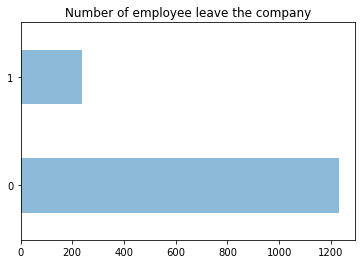

In [160]:
df['Left the company (in 2019)'].value_counts().plot(kind='barh', alpha=0.5)
plt.title("Number of employee leave the company");  
print('turnover rate is: ', round(237/1233,2))

In [157]:
y.value_counts()

0    1233
1     237
Name: Left the company (in 2019), dtype: int64

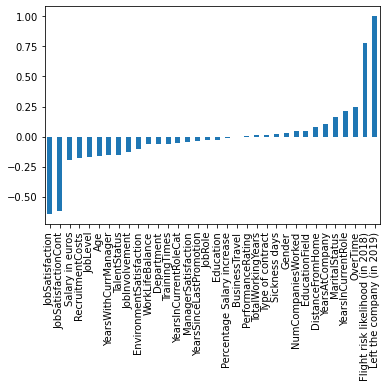

In [48]:
a = dd.corr()['Left the company (in 2019)'].sort_values()
a.plot.bar();

In [49]:
df['Left the company (in 2019)'].value_counts()

0    1233
1     237
Name: Left the company (in 2019), dtype: int64

In [50]:
dd = dd.drop('JobSatisfactionCont',axis=1)
dd

,Type of contract,Age,Gender,MaritalStatus,Education,EducationField,BusinessTravel,DistanceFromHome,Department,JobLevel,JobRole,Salary in euros,OverTime,PerformanceRating,Percentage Salary increase,TalentStatus,Sickness days,NumCompaniesWorked,TotalWorkingYears,TrainingTimes,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsInCurrentRoleCat,RecruitmentCosts,EnvironmentSatisfaction,ManagerSatisfaction,JobInvolvement,JobSatisfaction,Flight risk likelihood (in 2018),Left the company (in 2019)
0,0,23,0,2,0,1,2,0,1,1,1,809,1,0,0,0,7,8,16,0,0,14,13,0,5,1,783,1,0,2,0,100,1
1,0,41,0,1,1,0,2,2,1,0,2,238,1,3,9,2,5,4,15,3,1,4,3,0,0,0,0,2,0,3,1,2,0
2,0,12,1,0,2,1,2,23,1,0,2,246,0,3,11,1,12,1,5,2,2,5,4,0,0,2,39,3,1,2,2,36,0
3,0,20,1,2,1,1,1,22,0,2,6,1038,0,3,10,0,7,0,9,2,2,8,2,1,8,0,902,3,1,1,2,11,0
4,0,18,1,1,1,3,2,26,0,1,5,701,0,2,2,3,2,6,16,3,1,6,0,7,7,0,577,2,1,2,1,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,18,0,2,2,0,1,17,1,0,2,81,0,1,2,0,6,1,9,2,2,9,8,1,7,3,0,1,0,2,2,37,0
1466,0,22,1,1,4,1,0,8,0,1,5,644,0,1,3,1,8,9,11,5,0,9,8,0,2,3,475,3,3,1,3,21,0
1467,0,28,1,0,3,3,2,0,0,2,5,1033,0,0,5,1,6,7,27,3,2,14,13,0,3,1,896,3,2,2,0,1,0
1468,0,14,1,1,3,0,2,3,1,2,1,1093,0,1,0,0,3,1,13,2,1,13,4,9,8,2,929,3,2,0,0,91,1


In [61]:
cor = dd.corr()['Left the company (in 2019)'].sort_values()

In [52]:
y = dd['Left the company (in 2019)']
X = dd.drop('Left the company (in 2019)',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
y.value_counts()

0    1233
1     237
Name: Left the company (in 2019), dtype: int64

In [54]:
y_train.value_counts()

0    987
1    189
Name: Left the company (in 2019), dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_1 , y_1 = sm.fit_resample(X_train, y_train)

In [56]:
y_1.value_counts()

1    987
0    987
Name: Left the company (in 2019), dtype: int64

In [79]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=5).fit(X_1, y_1)

X_new.get_support(indices=True)
SelectKBest = pd.Series(X.columns[X_new.get_support(indices=True)])

In [80]:
Rf =RandomForestClassifier().fit(X_1,y_1)
importance = pd.Series(Rf.feature_importances_,index=X.columns)
RF_model = importance.sort_values(ascending=False).head(10)

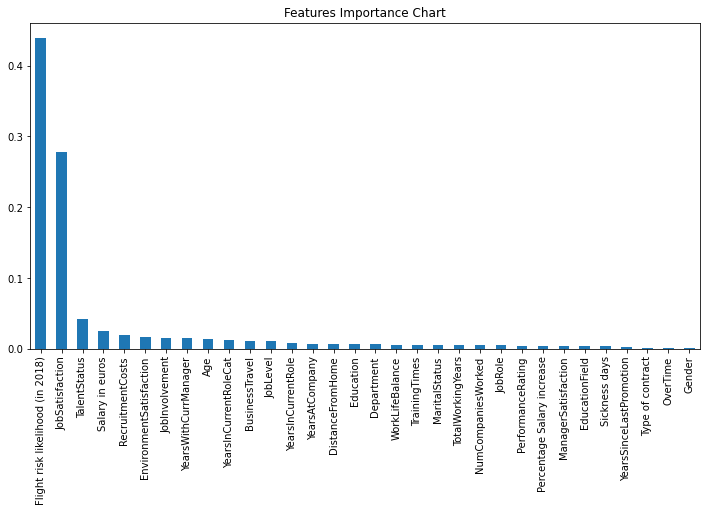

In [167]:
importance.sort_values(ascending=False).plot.bar(figsize=(12,6)).set_title("Features Importance Chart");# RF

In [82]:
lr = LogisticRegression(max_iter = 1000)
dt = DecisionTreeClassifier()
from sklearn.feature_selection import RFE
model_list = [lr,dt]

In [83]:
feature_names = X.columns

In [91]:
f = []
for model in model_list:
    
    print("-------------------------------------------------")
    
    rfe = RFE(estimator=model, n_features_to_select=4)
    
    print(model.__class__)
    rfe.fit(X_1, y_1)

    for i in range(0,32):
        if rfe.support_[i] == True:
            print(feature_names[i], end="\n")
            f.append(feature_names[i])
    print("")


-------------------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>


/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

TrainingTimes
EnvironmentSatisfaction
JobSatisfaction
Flight risk likelihood (in 2018)

-------------------------------------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
RecruitmentCosts
JobInvolvement
JobSatisfaction
Flight risk likelihood (in 2018)



In [95]:
lfg = f[0:4]
dtf = f[4:8]

In [96]:
RFE = pd.DataFrame([lfg,dtf],index = ['lr','dt']).T
RFE

,lr,dt
0,TrainingTimes,RecruitmentCosts
1,EnvironmentSatisfaction,JobInvolvement
2,JobSatisfaction,JobSatisfaction
3,Flight risk likelihood (in 2018),Flight risk likelihood (in 2018)


In [73]:
importance.sort_values

<bound method Series.sort_values of Type of contract                    0.001031
Age                                 0.009145
Gender                              0.001428
MaritalStatus                       0.002687
Education                           0.007394
EducationField                      0.003270
BusinessTravel                      0.007452
DistanceFromHome                    0.007188
Department                          0.008360
JobLevel                            0.019669
JobRole                             0.005096
Salary in euros                     0.026361
OverTime                            0.001910
PerformanceRating                   0.005770
Percentage Salary increase          0.003875
TalentStatus                        0.028375
Sickness days                       0.004050
NumCompaniesWorked                  0.004198
TotalWorkingYears                   0.005258
TrainingTimes                       0.003266
WorkLifeBalance                     0.006619
YearsAtCompany     

In [165]:
a = pd.DataFrame(SelectKBest.values)
a.columns = ['SelectKBest']
a

,SelectKBest
0,Age
1,Salary in euros
2,RecruitmentCosts
3,JobSatisfaction
4,Flight risk likelihood (in 2018)


In [162]:
RF_model.head()

Flight risk likelihood (in 2018)    0.438640
JobSatisfaction                     0.277874
TalentStatus                        0.041596
Salary in euros                     0.024746
RecruitmentCosts                    0.019593
dtype: float64

In [163]:
b = pd.DataFrame(RF_model.head().index)
b.columns = ['RF_mode']

In [101]:
RFE.columns= ['RFE_LR','RFE_DT']

In [169]:
qq = pd.concat([a,b,RFE],axis=1)
qq

,SelectKBest,RF_mode,RFE_LR,RFE_DT
0,Age,Flight risk likelihood (in 2018),TrainingTimes,RecruitmentCosts
1,Salary in euros,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement
2,RecruitmentCosts,TalentStatus,JobSatisfaction,JobSatisfaction
3,JobSatisfaction,Salary in euros,Flight risk likelihood (in 2018),Flight risk likelihood (in 2018)
4,Flight risk likelihood (in 2018),RecruitmentCosts,NaN,NaN


In [103]:
f = []
for i in pd.Series(SelectKBest.values):
    f.append(i)

In [104]:
for i in pd.Series(RF_model.index):
    f.append(i)

In [105]:
for i in pd.Series(RFE['RFE_LR']):
    f.append(i)

In [106]:
for i in pd.Series(RFE['RFE_LR']):
    f.append(i)

In [107]:
pd.Series(f).value_counts().sort_values(ascending=False)

JobSatisfaction                     4
Flight risk likelihood (in 2018)    4
EnvironmentSatisfaction             3
TrainingTimes                       2
Age                                 2
RecruitmentCosts                    2
Salary in euros                     2
JobInvolvement                      1
YearsWithCurrManager                1
TalentStatus                        1
YearsInCurrentRoleCat               1
dtype: int64

In [132]:
ff = pd.Series(f).value_counts().sort_values(ascending=False)[0:3].index
ff

Index(['JobSatisfaction', 'Flight risk likelihood (in 2018)',
       'EnvironmentSatisfaction'],
      dtype='object')

In [134]:
a = pd.DataFrame(ff)
a

,0
0,JobSatisfaction
1,Flight risk likelihood (in 2018)
2,EnvironmentSatisfaction


In [135]:
pd.Series(ff)

0                     JobSatisfaction
1    Flight risk likelihood (in 2018)
2             EnvironmentSatisfaction
dtype: object

In [113]:
models = []
models.append(('LR', LogisticRegression(max_iter = 1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier(max_iter = 1000)))
models.append(('AB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))

In [43]:
from sklearn.model_selection import RandomizedSearchCV # Use RandomizedSearchCV for hyperparameter tuning
from sklearn.metrics import accuracy_score

n_estimators = [int(x) for x in np.linspace(100,1000,num=10)]
max_depth=[int(x) for x in np.linspace(10,50,10)]
min_samples_split=[x for x in np.linspace(0.0001,0.01,10)]
min_samples_leaf=[x for x in np.linspace(0.00001,0.1,15)]

In [44]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


best_model_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, 
                                       n_iter = 100, cv = 2, random_state=42, n_jobs = -1)
best_model_random.fit(X_1,y_1)
best_model_random.best_params_ 

{'n_estimators': 600,
 'min_samples_split': 0.005600000000000001,
 'min_samples_leaf': 1e-05,
 'max_depth': 32}

In [45]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm}
best_model_random = RandomizedSearchCV(estimator =KNeighborsClassifier() , param_distributions = random_grid, 
                                       n_iter = 100, cv = 2, random_state=42, n_jobs = -1)
best_model_random.fit(X_1,y_1)
best_model_random.best_params_ 

/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'weights': 'uniform', 'n_neighbors': 2, 'algorithm': 'auto'}

In [46]:
n_estimators  = [int(x) for x in np.linspace(5,500,20)]
learning_rate = [x for x in np.linspace(0.01,5,20)]


random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}
best_model_random = RandomizedSearchCV(estimator =AdaBoostClassifier() , param_distributions = random_grid, 
                                       n_iter = 100, cv = 2, random_state=42, n_jobs = -1)
best_model_random.fit(X_1,y_1)
best_model_random.best_params_ 

{'n_estimators': 109, 'learning_rate': 1.0605263157894738}

In [47]:
max_depth=[int(x) for x in np.linspace(1,15,10)]
max_features = [x for x in np.linspace(0.01,5,10)]
criterion = ["gini", "entropy"]
random_grid = {'max_depth': max_depth,
               'max_features': max_features,
               'criterion': criterion}
best_model_random = RandomizedSearchCV(estimator =DecisionTreeClassifier() , param_distributions = random_grid, 
                                       n_iter = 100, cv = 2, random_state=42, n_jobs = -1)
best_model_random.fit(X_1,y_1)
best_model_random.best_params_ 

/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
162 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0

{'max_features': 0.5644444444444445, 'max_depth': 7, 'criterion': 'entropy'}

In [48]:
penalty = ['l1','l2']
C = [0.25,0.1,0.75,1]
fit_intercept=[True,False]
random_grid = {'penalty': penalty,
               'C': C,
               'fit_intercept': fit_intercept}
best_model_random = RandomizedSearchCV(estimator =LogisticRegression() , param_distributions = random_grid, 
                                       n_iter = 100, cv = 2, random_state=42, n_jobs = -1)
best_model_random.fit(X_1,y_1)
best_model_random.best_params_ 

/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
16 fits failed out of a total of 32.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a32294/opt/anaco

{'penalty': 'l2', 'fit_intercept': True, 'C': 0.1}

In [49]:
solver = ['lbfgs', 'sgd', 'adam']
learning_rate = ['constant', 'invscaling', 'adaptive']
random_grid = {'solver': solver,
               'learning_rate': learning_rate}
best_model_random = RandomizedSearchCV(estimator =MLPClassifier() , param_distributions = random_grid, 
                                       n_iter = 100, cv = 2, random_state=42, n_jobs = -1)
best_model_random.fit(X_1,y_1)
best_model_random.best_params_ 

/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'solver': 'adam', 'learning_rate': 'adaptive'}

In [50]:
models_new = []
models_new.append(('LR', LogisticRegression(penalty ='l2', fit_intercept = True,C= 0.25)))
models_new.append(('KNN', KNeighborsClassifier(weights= 'uniform', n_neighbors = 1, algorithm= 'auto')))
models_new.append(('DT', DecisionTreeClassifier(max_features=0.5644444444444445, 
                                                max_depth = 7, criterion= 'entropy')))
models_new.append(('NB', GaussianNB()))
models_new.append(('NN', MLPClassifier(solver= 'adam',learning_rate= 'constant')))
models_new.append(('AB', AdaBoostClassifier(n_estimators=57, learning_rate= 1.0605263157894738)))

models_new.append(('RF', RandomForestClassifier(n_estimators = 600,min_samples_split= 0.0001,
                                                min_samples_leaf=1e-05,
                                                max_depth=18)))


In [191]:
qq

,SelectKBest,RF_mode,RFE_LR,RFE_DT
0,Age,Flight risk likelihood (in 2018),TrainingTimes,RecruitmentCosts
1,Salary in euros,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement
2,RecruitmentCosts,TalentStatus,JobSatisfaction,JobSatisfaction
3,JobSatisfaction,Salary in euros,Flight risk likelihood (in 2018),Flight risk likelihood (in 2018)
4,Flight risk likelihood (in 2018),RecruitmentCosts,NaN,NaN


In [422]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RF_mode']])
X_scaled = scaler.transform(X_1[qq['RF_mode']])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['RF_mode']])
X_scaled1 = scaler1.transform(X_test[qq['RF_mode']])

scores = []
names = []
for name,model in models:
    m = model.fit(X_1[qq['RF_mode']],y_1)
    scores.append(m.score(X_test[qq['RF_mode']],y_test))
    names.append(name)
results = pd.DataFrame(scores,index = names).T
results

,LR,KNN,DT,NB,NN,AB,RF
0,1.0,0.911565,1.0,0.972789,0.972789,1.0,1.0


In [421]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['SelectKBest']])
X_scaled = scaler.transform(X_1[qq['SelectKBest']])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['SelectKBest']])
X_scaled1 = scaler1.transform(X_test[qq['SelectKBest']])

scores1 = []
names1 = []
for name,model in models:
    m = model.fit(X_1[qq['SelectKBest']],y_1)
    scores1.append(m.score(X_test[qq['SelectKBest']],y_test))
    names1.append(name)
results1 = pd.DataFrame(scores1,index = names1).T
results1

,LR,KNN,DT,NB,NN,AB,RF
0,1.0,0.908163,1.0,0.969388,0.979592,1.0,1.0


In [420]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RFE_LR'].dropna()])
X_scaled = scaler.transform(X_1[qq['RFE_LR'].dropna()])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['RFE_LR'].dropna()])
X_scaled1 = scaler1.transform(X_test[qq['RFE_LR'].dropna()])

scores2 = []
names2 = []
for name,model in models:
    m = model.fit(X_1[qq['RFE_LR'].dropna()],y_1)
    scores2.append(m.score(X_test[qq['RFE_LR'].dropna()],y_test))
    names2.append(name)
results2 = pd.DataFrame(scores2,index = names2).T
results2

,LR,KNN,DT,NB,NN,AB,RF
0,1.0,1.0,1.0,0.972789,0.979592,0.996599,1.0


In [419]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RFE_DT'].dropna()])
X_scaled = scaler.transform(X_1[qq['RFE_DT'].dropna()])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['RFE_DT'].dropna()])
X_scaled1 = scaler1.transform(X_test[qq['RFE_DT'].dropna()])

scores3 = []
names3 = []
for name,model in models:
    m = model.fit(X_1[qq['RFE_DT'].dropna()],y_1)
    scores3.append(m.score(X_test[qq['RFE_DT'].dropna()],y_test))
    names3.append(name)
results3 = pd.DataFrame(scores3,index = names3).T
results3

,LR,KNN,DT,NB,NN,AB,RF
0,1.0,0.97619,1.0,0.969388,0.969388,1.0,1.0


In [423]:
acc = pd.concat([results,results1,results2,results3],
                axis=0)
acc.index =['RF_model','SelectKBest','RFE_LR','RFE_DT']
acc

,LR,KNN,DT,NB,NN,AB,RF
RF_model,1.0,0.911565,1.0,0.972789,0.972789,1.000000,1.0
SelectKBest,1.0,0.908163,1.0,0.969388,0.979592,1.000000,1.0
RFE_LR,1.0,1.000000,1.0,0.972789,0.979592,0.996599,1.0
RFE_DT,1.0,0.976190,1.0,0.969388,0.969388,1.000000,1.0


In [253]:
acc.to_excel('fitting.xlsx')

In [252]:
?pd.DataFrame.to_excel

In [234]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RFE_DT'].dropna()])
X_scaled = scaler.transform(X_1[qq['RFE_DT'].dropna()])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['RFE_DT'].dropna()])
X_scaled1 = scaler1.transform(X_test[qq['RFE_DT'].dropna()])

scores33 = []
names33 = []
for name,model in models:
    m = model.fit(X_scaled,y_1)
    scores33.append(m.score(X_scaled,y_1))
    names33.append(name)
results33 = pd.DataFrame(scores33,index = names33).T
results33

,LR,KNN,DT,NB,NN,AB,RF
0,0.996454,0.994428,1.0,0.985816,0.99848,1.0,1.0


In [235]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RFE_LR'].dropna()])
X_scaled = scaler.transform(X_1[qq['RFE_LR'].dropna()])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['RFE_LR'].dropna()])
X_scaled1 = scaler1.transform(X_test[qq['RFE_LR'].dropna()])

scores22 = []
names22 = []
for name,model in models:
    m = model.fit(X_scaled,y_1)
    scores22.append(m.score(X_scaled,y_1))
    names22.append(name)
results22 = pd.DataFrame(scores22,index = names22).T
results22

,LR,KNN,DT,NB,NN,AB,RF
0,0.99696,0.992401,1.0,0.985309,0.997974,1.0,1.0


In [239]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['SelectKBest']])
X_scaled = scaler.transform(X_1[qq['SelectKBest'].dropna()])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['SelectKBest'].dropna()])
X_scaled1 = scaler1.transform(X_test[qq['SelectKBest'].dropna()])

scores11 = []
names11 = []
for name,model in models:
    m = model.fit(X_scaled,y_1)
    scores11.append(m.score(X_scaled,y_1))
    names11.append(name)
results11 = pd.DataFrame(scores11,index = names11).T
results11

,LR,KNN,DT,NB,NN,AB,RF
0,0.99696,0.993414,1.0,0.985816,0.998987,1.0,1.0


In [241]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RF_mode']])
X_scaled = scaler.transform(X_1[qq['RF_mode'].dropna()])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['RF_mode'].dropna()])
X_scaled1 = scaler1.transform(X_test[qq['RF_mode'].dropna()])

scores00 = []
names00 = []
for name,model in models:
    m = model.fit(X_scaled,y_1)
    scores00.append(m.score(X_scaled,y_1))
    names00.append(name)
results00 = pd.DataFrame(scores00,index = names00).T
results00

,LR,KNN,DT,NB,NN,AB,RF
0,0.995441,0.990881,1.0,0.980243,0.99848,1.0,1.0


In [244]:
fit = pd.concat([results00,results11,results22,results33],axis=0)
fit.index = ['RF_model','SelectKBest','RFE_LR','RFE_DT']
fit

,LR,KNN,DT,NB,NN,AB,RF
RF_model,0.995441,0.990881,1.0,0.980243,0.998480,1.0,1.0
SelectKBest,0.996960,0.993414,1.0,0.985816,0.998987,1.0,1.0
RFE_LR,0.996960,0.992401,1.0,0.985309,0.997974,1.0,1.0
RFE_DT,0.996454,0.994428,1.0,0.985816,0.998480,1.0,1.0


In [254]:
fit.to_excel('fitting.xlsx')

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RFE_DT'].dropna()])
X_scaled = scaler.transform(X_1[qq['RFE_DT'].dropna()])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['RFE_LR'].dropna()])
X_scaled1 = scaler1.transform(X_test[qq['RFE_DT'].dropna()])

scores11 = []
names22 = []
for name,model in models:
    m = model.fit(X_scaled,y_1)
    scores22.append(m.score(X_scaled,y_1))
    names22.append(name)
results22 = pd.DataFrame(scores22,index = names22).T
results22

In [210]:
from sklearn.metrics import f1_score

In [424]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RFE_DT'].dropna()])
X_scaled = scaler.transform(X_1[qq['RFE_DT'].dropna()])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['RFE_DT'].dropna()])
X_scaled1 = scaler1.transform(X_test[qq['RFE_DT'].dropna()])

f3 = []
names3 = []
for name,model in models:
    m = model.fit(X_1[qq['RFE_DT'].dropna()],y_1)
    p = model.predict(X_test[qq['RFE_DT'].dropna()])
    f3.append(f1_score(y_test,p,average='weighted'))
    names3.append(name)
ff3 = pd.DataFrame(f3,index = names3).T
ff3

,LR,KNN,DT,NB,NN,AB,RF
0,1.0,0.976089,1.0,0.969258,0.983064,1.0,1.0


In [425]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RFE_LR'].dropna()])
X_scaled = scaler.transform(X_1[qq['RFE_LR'].dropna()])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['RFE_LR'].dropna()])
X_scaled1 = scaler1.transform(X_test[qq['RFE_LR'].dropna()])

f2 = []
names2 = []
for name,model in models:
    m = model.fit(X_1[qq['RFE_LR'].dropna()],y_1)
    p = model.predict(X_test[qq['RFE_LR'].dropna()])
    f2.append(f1_score(y_test,p,average='weighted'))
    names2.append(name)
ff2 = pd.DataFrame(f2,index = names2).T
ff2

,LR,KNN,DT,NB,NN,AB,RF
0,1.0,1.0,1.0,0.972789,0.989919,0.996584,1.0


In [426]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['SelectKBest'].dropna()])
X_scaled = scaler.transform(X_1[qq['SelectKBest'].dropna()])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['SelectKBest'].dropna()])
X_scaled1 = scaler1.transform(X_test[qq['SelectKBest'].dropna()])

f1 = []
names1 = []
for name,model in models:
    m = model.fit(X_1[qq['SelectKBest'].dropna()],y_1)
    p = model.predict(X_test[qq['SelectKBest'].dropna()])
    f1.append(f1_score(y_test,p,average='weighted'))
    names1.append(name)
ff1 = pd.DataFrame(f1,index = names1).T
ff1

,LR,KNN,DT,NB,NN,AB,RF
0,1.0,0.909965,1.0,0.969258,0.96384,1.0,1.0


In [427]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RF_mode'].dropna()])
X_scaled = scaler.transform(X_1[qq['RF_mode'].dropna()])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['RF_mode'].dropna()])
X_scaled1 = scaler1.transform(X_test[qq['RF_mode'].dropna()])

f0 = []
names0 = []
for name,model in models:
    m = model.fit(X_1[qq['RF_mode'].dropna()],y_1)
    p = model.predict(X_test[qq['RF_mode'].dropna()])
    f0.append(f1_score(y_test,p,average='weighted'))
    names0.append(name)
ff0 = pd.DataFrame(f1,index = names1).T
ff0

,LR,KNN,DT,NB,NN,AB,RF
0,1.0,0.909965,1.0,0.969258,0.96384,1.0,1.0


In [218]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RF_mode']])
X_scaled = scaler.transform(X_1[qq['RF_mode']])

scaler1 = preprocessing.StandardScaler().fit(X_test[qq['RF_mode']])
X_scaled1 = scaler1.transform(X_test[qq['RF_mode']])

lr = LogisticRegression(max_iter=1000)
lr.fit(X_scaled,y_1)

pre = lr.predict(X_scaled1)
f1_score(y_test,pre,average='weighted')

0.8124328501686991

In [271]:
f1.mean(axis=1).sort_values()

RFE_DT         0.783655
RF_model       0.786919
SelectKBest    0.786919
RFE_LR         0.791400
dtype: float64

In [463]:
lr = LogisticRegression(penalty='l2',C=0.01,tol = 0.1,dual=False,solver='newton-cg',fit_intercept=True)
lr.fit(X[qq['RFE_LR'].dropna()],y_1)

#pred_prob = lr.predict_proba(X_1)
#f1_score(y_test,pre,average='weighted')

pre = lr.predict(X_test[qq['RFE_LR'].dropna()])

confusion_matrix(y_test,pre)

array([[246,   0],
       [  1,  47]])

In [446]:
?LogisticRegression

In [464]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      0.98      0.99        48

    accuracy                           1.00       294
   macro avg       1.00      0.99      0.99       294
weighted avg       1.00      1.00      1.00       294



In [468]:
aa = pd.DataFrame(lr.coef_).T
aa.index=X_test[qq['RFE_LR'].dropna()].columns
aa.columns = ['value']
aa

,value
TrainingTimes,-0.095400
EnvironmentSatisfaction,-0.130267
JobSatisfaction,-0.284256
Flight risk likelihood (in 2018),0.583952


In [469]:
aa.sort_values(by='value').loc[qq['RFE_LR'].dropna()].T

,TrainingTimes,EnvironmentSatisfaction,JobSatisfaction,Flight risk likelihood (in 2018)
value,-0.0954,-0.130267,-0.284256,0.583952


In [470]:
qq['RFE_LR'].dropna()

0                       TrainingTimes
1             EnvironmentSatisfaction
2                     JobSatisfaction
3    Flight risk likelihood (in 2018)
Name: RFE_LR, dtype: object

In [ ]:
print(classification_report(y_t,pre))

In [270]:
acc.mean(axis=1).sort_values()

RFE_LR         0.752672
SelectKBest    0.756074
RF_model       0.760447
RFE_DT         0.761419
dtype: float64

In [428]:
f1 = pd.concat([ff0,ff1,ff2,ff3],axis = 0)
f1.index = ['RF_model','SelectKBest','RFE_LR','RFE_DT']
f1.to_excel('f1_measurement.xlsx')
f1

,LR,KNN,DT,NB,NN,AB,RF
RF_model,1.0,0.909965,1.0,0.969258,0.963840,1.000000,1.0
SelectKBest,1.0,0.909965,1.0,0.969258,0.963840,1.000000,1.0
RFE_LR,1.0,1.000000,1.0,0.972789,0.989919,0.996584,1.0
RFE_DT,1.0,0.976089,1.0,0.969258,0.983064,1.000000,1.0


In [431]:
acc.mean(axis=1).sort_values()

SelectKBest    0.979592
RF_model       0.979592
RFE_DT         0.987852
RFE_LR         0.992711
dtype: float64

In [433]:
acc.to_excel('accuracy.xlsx')
f1.to_excel('f1.xlsx')

In [432]:
f1.mean(axis=1).sort_values()

RF_model       0.977580
SelectKBest    0.977580
RFE_DT         0.989773
RFE_LR         0.994185
dtype: float64

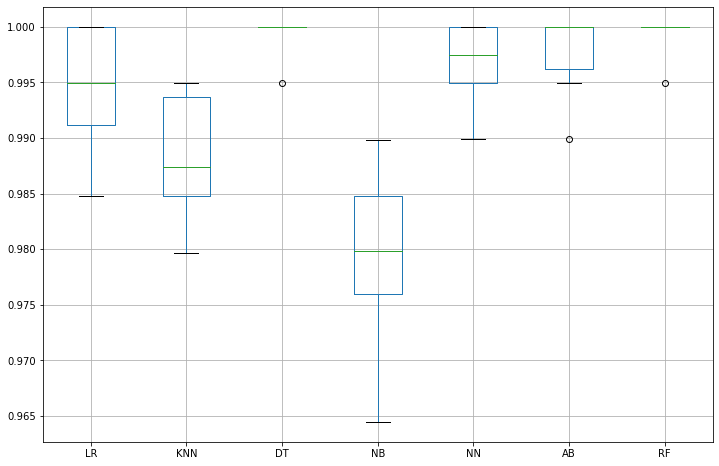

In [181]:
scaler = preprocessing.StandardScaler().fit(X_1[qq['RF_mode']])
X_scaled = scaler.transform(X_1[qq['RF_mode']])

scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_scaled, y_1, scoring='accuracy', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results1 = pd.DataFrame(scores,index = names).T
results1

results1.boxplot(figsize=(12,8)); 

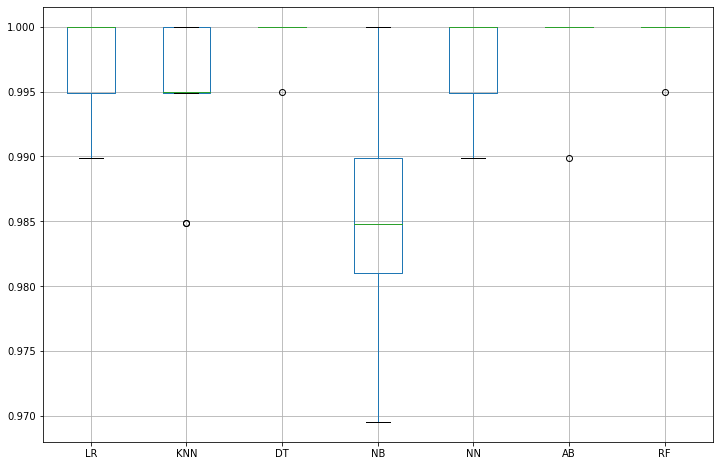

In [136]:
scaler = preprocessing.StandardScaler().fit(X_1[ff])
X_scaled = scaler.transform(X_1[ff])

scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_scaled, y_1, scoring='accuracy', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results1 = pd.DataFrame(scores,index = names).T
results1

results1.boxplot(figsize=(12,8)); 

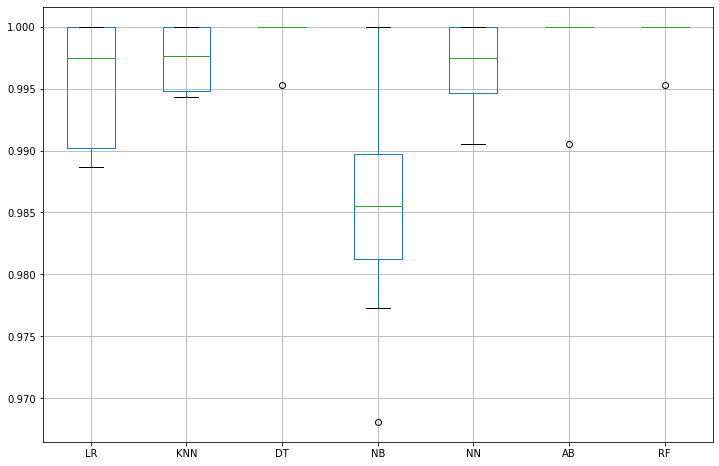

In [128]:
scaler = preprocessing.StandardScaler().fit(X_1[ff])
X_scaled = scaler.transform(X_1[ff])

scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_scaled, y_1, scoring='f1', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results2 = pd.DataFrame(scores,index = names).T
results2

results2.boxplot(figsize=(12,8)); 

In [127]:
scaler = preprocessing.StandardScaler().fit(X_1[ff])
X_scaled = scaler.transform(X_1[ff])

scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_scaled, y_1, scoring='average_precision', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results3 = pd.DataFrame(scores,index = names).T
results3

results2.boxplot(figsize=(12,8)); 

NameError: name 'results2' is not defined

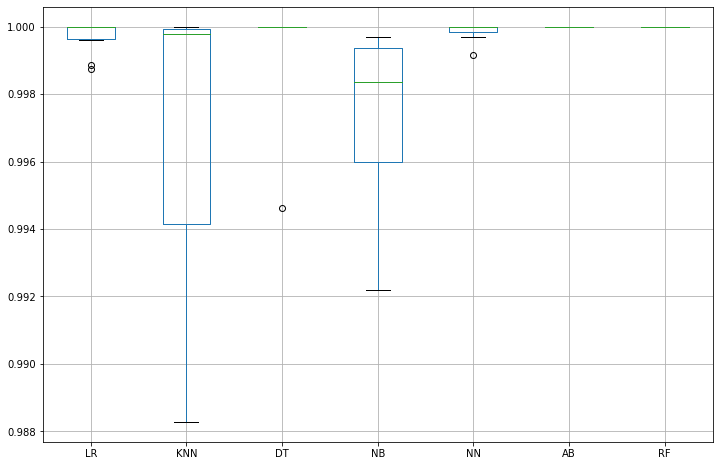

In [217]:
scaler = preprocessing.StandardScaler().fit(X_1[ff])
X_scaled = scaler.transform(X_1[ff])

scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_scaled, y_1, scoring='roc_auc', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results4 = pd.DataFrame(scores,index = names).T
results4

results4.boxplot(figsize=(12,8)); 

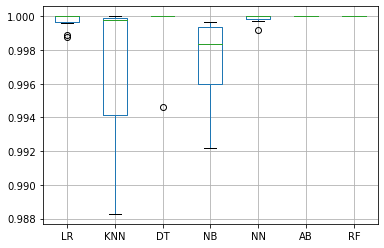

In [218]:
results4.boxplot(figsize=(6,4));

In [219]:
pd.DataFrame([results1.mean(),results2.mean(),results3.mean(),results4.mean()],
             index = ['Accuracy','F1','Precision','Roc_auc']).T

,Accuracy,F1,Precision,Roc_auc
LR,0.996965,0.996972,0.999700,0.999700
KNN,0.989871,0.989927,0.995119,0.996548
DT,0.999495,0.999526,0.999057,0.999462
NB,0.978219,0.977811,0.997782,0.997445
NN,0.996457,0.996972,0.999857,0.999866
AB,0.998990,0.999057,1.000000,1.000000
RF,0.999495,1.000000,1.000000,1.000000


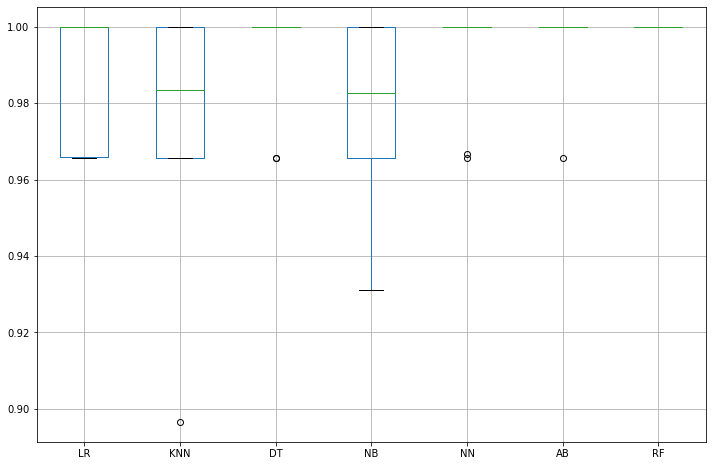

In [220]:
scaler = preprocessing.StandardScaler().fit(X_test[ff])
X_scaled = scaler.transform(X_test[ff])

scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_scaled, y_test, scoring='accuracy', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results5 = pd.DataFrame(scores,index = names).T
results5

results5.boxplot(figsize=(12,8)); 

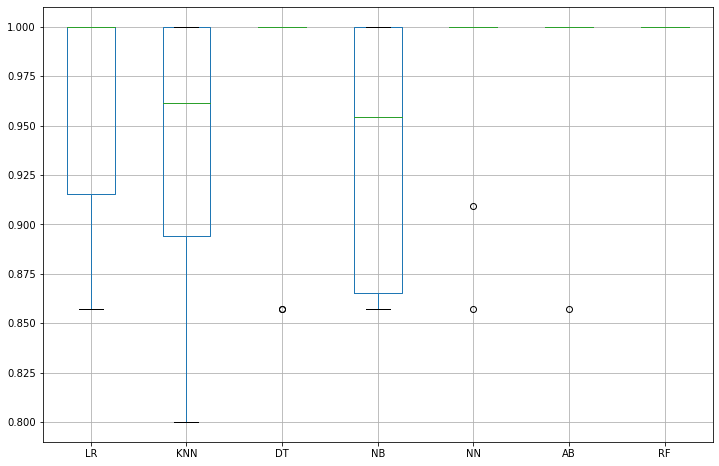

In [221]:
scaler = preprocessing.StandardScaler().fit(X_test[ff])
X_scaled = scaler.transform(X_test[ff])

scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_scaled, y_test, scoring='f1', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results6 = pd.DataFrame(scores,index = names).T
results6

results6.boxplot(figsize=(12,8)); 

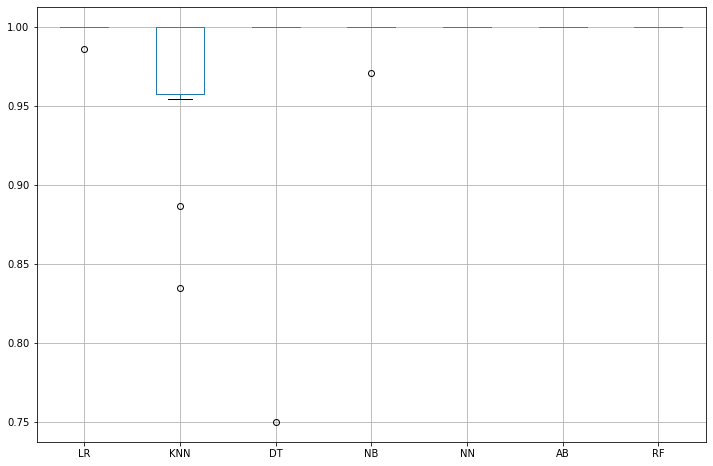

In [222]:
scaler = preprocessing.StandardScaler().fit(X_test[ff])
X_scaled = scaler.transform(X_test[ff])

scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_scaled, y_test, scoring='average_precision', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results7 = pd.DataFrame(scores,index = names).T
results7

results7.boxplot(figsize=(12,8)); 

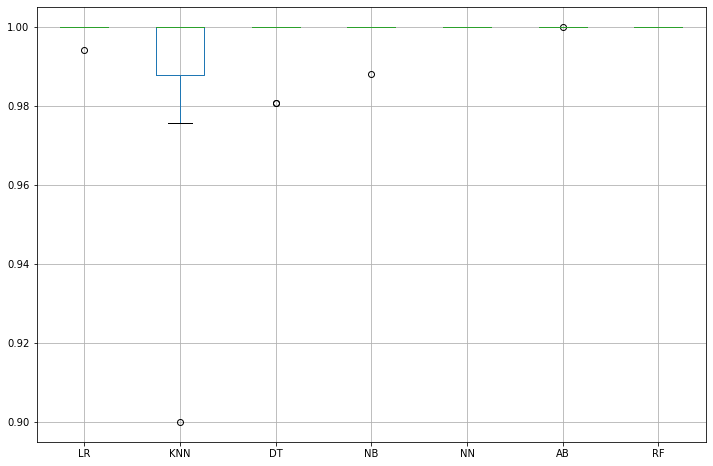

In [223]:
scaler = preprocessing.StandardScaler().fit(X_test[ff])
X_scaled = scaler.transform(X_test[ff])

scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_scaled, y_test, scoring='roc_auc', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results8 = pd.DataFrame(scores,index = names).T
results8

results8.boxplot(figsize=(12,8)); 

In [224]:
pd.DataFrame([results5.mean(),results6.mean(),results7.mean(),results8.mean()],
             index = ['Accuracy','F1','Precision','Roc_auc']).T

,Accuracy,F1,Precision,Roc_auc
LR,0.986322,0.958846,0.998611,0.999405
KNN,0.975977,0.937820,0.964242,0.985665
DT,0.993103,0.971429,0.975000,0.996154
NB,0.979310,0.936941,0.997049,0.998810
NN,0.993218,0.976623,1.000000,1.000000
AB,0.996552,0.985714,1.000000,1.000000
RF,1.000000,1.000000,1.000000,1.000000


In [225]:
pd.DataFrame([results1.mean(),results2.mean(),results3.mean(),results4.mean()],
             index = ['Accuracy','F1','Precision','Roc_auc']).T

,Accuracy,F1,Precision,Roc_auc
LR,0.996965,0.996972,0.999700,0.999700
KNN,0.989871,0.989927,0.995119,0.996548
DT,0.999495,0.999526,0.999057,0.999462
NB,0.978219,0.977811,0.997782,0.997445
NN,0.996457,0.996972,0.999857,0.999866
AB,0.998990,0.999057,1.000000,1.000000
RF,0.999495,1.000000,1.000000,1.000000


In [ ]:
for model in models_new:   

In [ ]:
results

In [ ]:
dt = DecisionTreeClassifier(max_features=0.5644444444444445, max_depth = 7, criterion= 'entropy')
dt.fit(X_1,y_1)
(dt.predict(X_test) - y_test).value_counts()

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_1,y_1)
(dt.predict(X_test) - y_test).value_counts()

In [ ]:
s = {}
for name,model in models_new:
    mo = model.fit(X_1,y_1)
    f = f1_score(y_test, mo.predict(X_test), average='weighted')
    s.update({name:f})
s

In [ ]:
t = {}
for name,model in models_new:
    mo = model.fit(X_1,y_1)
    f = roc_auc_score(y_test, mo.predict(X_test))
    t.update({name:f})
t

In [ ]:
d = {}
for name,model in models_new:
    mo = model.fit(X_1,y_1)
    f = accuracy_score(y_test, mo.predict(X_test))
    d.update({name:f})
d

In [ ]:
pd.DataFrame([s,t,d],index = ['F1','AUC','accuracy'])

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_1)
X_scaled = scaler.transform(X_1)

scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_scaled, y_1, scoring='accuracy', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results2 = pd.DataFrame(scores,index = names).T
results2

results2.boxplot(figsize=(12,8)); # RandomForest is the best

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

scores = []
names = []
for name,model in models:
    crossval_scores = cross_val_score(model, X_scaled, y_train.values.ravel(), scoring='accuracy', cv=kf)
    scores.append(crossval_scores)
    names.append(name)
    
results = pd.DataFrame(scores,index = names).T
results

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
best_model = DecisionTreeClassifier()
n_estimators = [int(x) for x in np.linspace(5,30,num=25)]
random_grid = {'k': n_estimators}

In [ ]:
best_model_random = RandomizedSearchCV(estimator = best_model, param_distributions = random_grid, 
                                       random_state=42, n_jobs = -1)

In [ ]:
final_model = best_model.fit(X_train,y_train)

In [ ]:
importance = pd.Series(final_model.feature_importances_,index=X_test.columns)
importance.sort_values(ascending=False)

In [ ]:
importance.plot.bar(figsize=(12,6)).set_title("Features Importance Chart");# RF

In [ ]:
importance = pd.Series(final_model.feature_importances_,index=X_test.columns)
importance.plot.bar(figsize=(12,6)).set_title("Features Importance Chart");# DT

In [ ]:
importance = pd.Series(final_model.feature_importances_,index=X_test.columns)
importance.plot.bar(figsize=(12,6)).set_title("Features Importance Chart");# LR

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
X_new.shape

In [ ]:
X_new[0]

[1, 19, 3]

In [ ]:
d.corr().iloc[:,-1].sort_values()

In [471]:
final_model = DecisionTreeClassifier().fit(X,y)

In [374]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


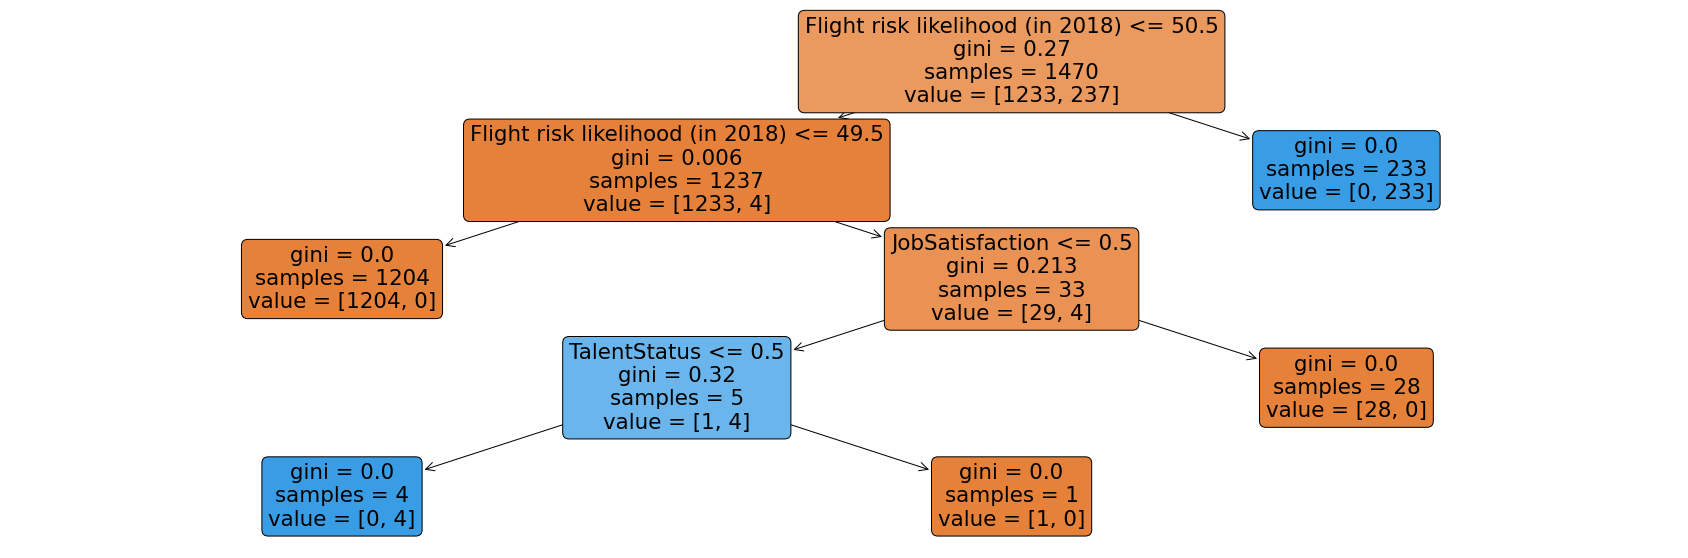

In [472]:
from sklearn import tree
plt.figure(figsize=(30,10))  
_ = tree.plot_tree(final_model, feature_names = X.columns, 
             filled=True, rounded = True)
plt.show()

In [495]:
lab = X['JobSatisfaction']

In [496]:
qq = X.copy()
fea = qq.drop(['JobSatisfaction','Flight risk likelihood (in 2018)'],
              axis=1)

In [498]:
scale = preprocessing.StandardScaler().fit(fea)
fea_scaled = scale.transform(fea)

rf1 =RandomForestClassifier().fit(fea_scaled,lab)
imp = pd.Series(rf1.feature_importances_,index=fea.columns)
mod = imp.sort_values(ascending=False)
mod

Salary in euros               0.071379
RecruitmentCosts              0.067252
Age                           0.063400
DistanceFromHome              0.055140
TotalWorkingYears             0.049082
Percentage Salary increase    0.047012
YearsAtCompany                0.046925
YearsInCurrentRole            0.046754
Sickness days                 0.045855
YearsWithCurrManager          0.043234
NumCompaniesWorked            0.039751
YearsSinceLastPromotion       0.034273
TrainingTimes                 0.034234
JobRole                       0.029589
EducationField                0.028859
Education                     0.028283
PerformanceRating             0.027476
EnvironmentSatisfaction       0.027294
ManagerSatisfaction           0.026934
WorkLifeBalance               0.023832
JobInvolvement                0.023637
TalentStatus                  0.022170
YearsInCurrentRoleCat         0.020023
BusinessTravel                0.017021
MaritalStatus                 0.016944
OverTime                 

In [512]:
mod.head(3).index

Index(['Salary in euros', 'RecruitmentCosts', 'Age'], dtype='object')

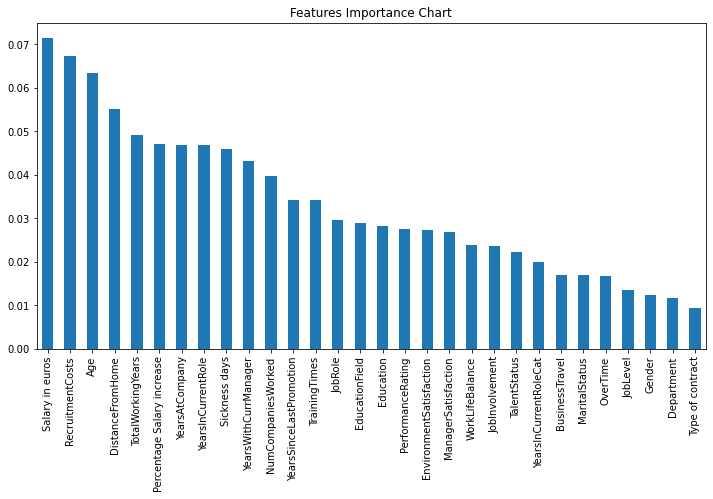

In [499]:
mod.sort_values(ascending=False).plot.bar(figsize=(12,6)).set_title("Features Importance Chart");# RF

In [504]:
lr = LogisticRegression(max_iter = 1000)
dt = DecisionTreeClassifier()
from sklearn.feature_selection import RFE
model_list = [lr,dt]

feature_names = fea.columns

f = []
for model in model_list:
    
    print("-------------------------------------------------")
    
    rfe = RFE(estimator=model, n_features_to_select=3)
    
    print(model.__class__)
    rfe.fit(fea, lab)

    for i in range(0,30):
        if rfe.support_[i] == True:
            print(feature_names[i], end="\n")
            f.append(feature_names[i])
    print("")




-------------------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>


/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

OverTime
TalentStatus
JobInvolvement

-------------------------------------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Age
Salary in euros
RecruitmentCosts



In [510]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=3).fit(fea, lab)

X_new.get_support(indices=True)
SelectKBest = pd.Series(fea.columns[X_new.get_support(indices=True)])
SelectKBest

0       Salary in euros
1    YearsInCurrentRole
2      RecruitmentCosts
dtype: object

In [517]:
SelectKBest[1]='RecruitmentCosts'
SelectKBest[2]='YearsInCurrentRole'

In [528]:
u = pd.DataFrame([SelectKBest,mod.head(3).index]).T
u.index=['first important','second important','third important']
u.columns=['SelectKBest','Randome Forest']
u

,SelectKBest,Randome Forest
first important,Salary in euros,Salary in euros
second important,RecruitmentCosts,RecruitmentCosts
third important,YearsInCurrentRole,Age
